In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

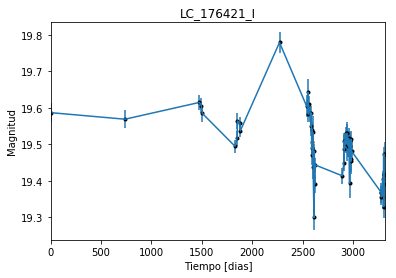

In [2]:
data = np.genfromtxt('LC_176421_I.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_176421_I')
plt.savefig("LC_176421_I.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

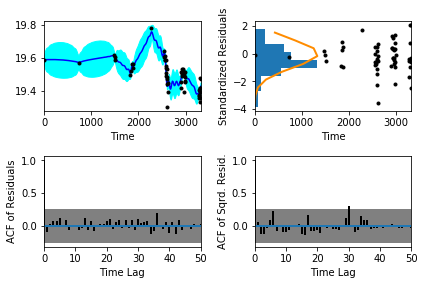

In [5]:
sample.assess_fit()

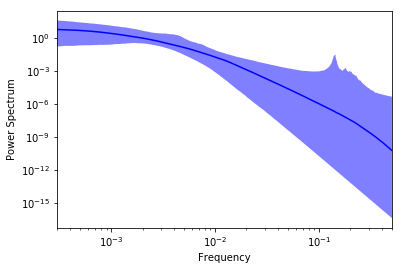

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

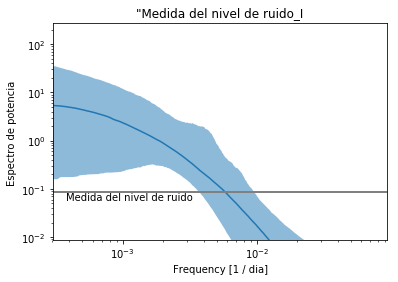

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_176421_I')
plt.title('"Medida del nivel de ruido_I')
plt.savefig("Medida del nivel de ruido_I.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_176421_I')

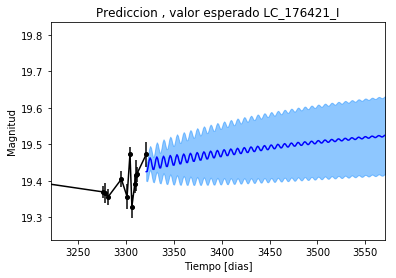

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_176421_I')

Text(0.5,1,'Prediccion, Caminos simulados  LC_176421_I')

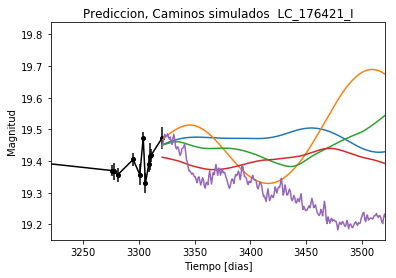

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_176421_I')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


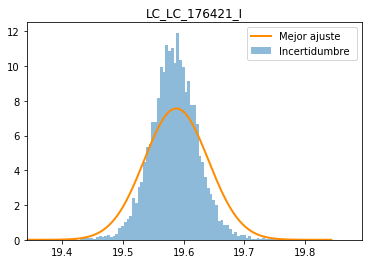

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_LC_176421_I')
plt.savefig("Mejor_ajuste_LC_176421_I.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_176421_I')

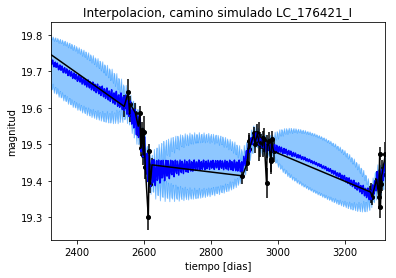

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_I')

Text(0.5,1,'Interpolacion, camino simulado LC_176421_I')

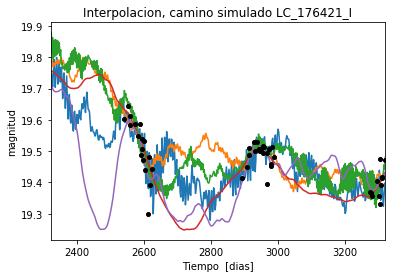

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_176421_I')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 218.495245472
Median: 0.00529223587302
Standard deviation: 0.172066738013
68% credibility interval: [ 0.00087548  0.10695086]
95% credibility interval: [  3.83274740e-04   6.92779977e-01]
99% credibility interval: [  3.15152689e-04   9.17816157e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 593.163428549
Median: 0.00212941654779
Standard deviation: 0.0680394125998
68% credibility interval: [ 0.00061506  0.01241485]
95% credibility interval: [ 0.0003439   0.14113665]
99% credibility interval: [  3.09013091e-04   5.35102406e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 720.953674471
Median: 0.0406632592733
Standard

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 164.83679524
Median: 113.158142093
Standard deviation: 2.41531769618
68% credibility interval: [ 111.25595695  115.33607694]
95% credibility interval: [ 108.88103875  118.97619599]
99% credibility interval: [ 106.58408899  119.49378623]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 622.141903793
Median: 0.644540998357
Standard deviation: 1.88972044565
68% credibility interval: [ 0.09635848  3.42762575]
95% credibility interval: [ 0.02050508  6.39909349]
99% credibility interval: [ 0.01424219  8.97915412]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 404.297594872
Median: 0.775541129989
Standard deviation: 7.57367957685
68% credibility interval: [ 0.02411813  5.14871518]
95% credibility interval: [  1.94976801e-0

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 19923.2295198
Median: 4.11228689182e-29
Standard deviation: 1.15290342733e+63
68% credibility interval: [  1.68222285e-91   6.70932563e-08]
95% credibility interval: [  2.42630657e-139   5.36907350e+037]
99% credibility interval: [  5.72716875e-145   5.26020065e+051]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 721.988440783
Median: 19.5467585915
Standard deviation: 0.0611781204647
68% credibility interval: [ 19.49660667  19.60210934]
95% credibility interval: [ 19.43324903  19.67492304]
99% credibility interval: [ 19.36282715  19.74745442]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 466.670118359
Median: 0.0118289359153
Standard deviation: 0.223283483939
68% credibility interval: [ 0.          0.25814332]
95% credibility interval: [ 0.         0.8568448]
99% credibility interval: [ 0.          0.95344273]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 466.670118359
Median: 0.0118289359153
Standard deviation: 0.223283483939
68% credibility interval: [ 0.          0.25814332]
95% credibility interval: [ 0.         0.8568448]
99% credibility interval: [ 0.          0.95344273]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 613.851251987
Median: 0.0
Standard deviation: 0.000991035239032
68% credib

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 164.83679524
Median: 113.158142093
Standard deviation: 2.41531769618
68% credibility interval: [ 111.25595695  115.33607694]
95% credibility interval: [ 108.88103875  118.97619599]
99% credibility interval: [ 106.58408899  119.49378623]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2779.35157166
Median: 0.0167304683153
Standard deviation: 0.0215193351161
68% credibility interval: [ 0.00968051  0.03307855]
95% credibility interval: [ 0.00622348  0.07082877]
99% credibility interval: [ 0.00464851  0.13319094]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 386.148071538
Median: 1.44165846899
Standard deviation: 0.256643056623
68% credibility interval: [ 1.16243883  1.69078876]
95% credibility interval: [ 0.88282357  1.91147952]
99% credibility interval: [ 0.78247837  1.97562368]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 125.025889436
Median: 0.000452389792835
Standard deviation: 0.0912262477106
68% credibility interval: [  3.27963351e-06   9.69029804e-03]
95% credibility interval: [  7.04463833e-41   2.36233661e-01]
99% credibility interval: [  4.63749672e-56   6.77045095e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 218.495245472
Median: (-0.0332520986795-0.869740948707j)
Standard deviation: 1.77117272798
68% credibility interval: [-0.67199205+0.j         -0.00550082-0.90590578j]
95% credibility interval: [ -4.35286497e+00-4.85302645j  -2.40818622e-03-1.63017375j]
99% credibility interval: [ -5.76680899e+00-0.54591162j  -1.98016274e-03-0.88019572j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 593.163428549
Median: (-0.0133795187659+0.884487577743j)
Standard deviation: 1.46662083804
68% credibility interval: [-0.07800480+0.05341852j -0.00386455+0.03931199j]
95% credibility interval: [-0.88678775+1.15238294j -0.00216079+0.j        ]
99% credibility interval: [ -3.36214758e+00+4.67410699j  -1.94158651e-03+0.05925446j]
Posterior su